In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [3]:
import sys
sys.path.append('..')

from util.participant_stream import ParticipantStream

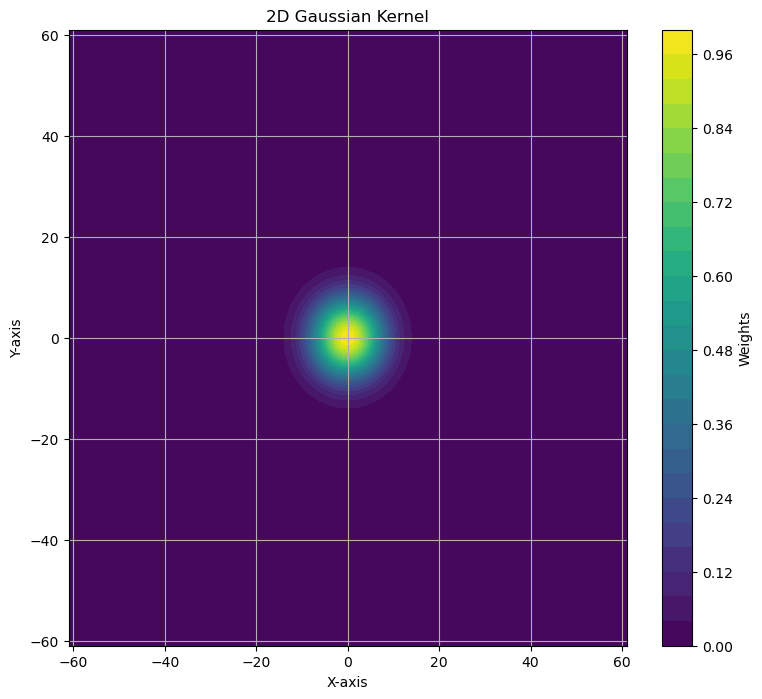

In [9]:
# Define the domain
x = np.linspace(-61, 61, 123)  # 123 points to include each integer bin
y = np.linspace(-61, 61, 123)
X, Y = np.meshgrid(x, y)

# Create a 2D Gaussian kernel
# Assuming a standard 2D Gaussian with mean at (0,0) and std deviation of 1 in both axes
mu = np.array([0, 0])
covariance = np.array([[30, 0], [0, 30]])
gaussian_kernel = stats.multivariate_normal(mean=mu, cov=covariance)

# Evaluate the kernel on the grid
Z = gaussian_kernel.pdf(np.dstack((X, Y)))

# Adjust Z to peak at 1
Zw = Z / np.max(Z)

# Plotting
plt.figure(figsize=(9, 8))
plt.contourf(X, Y, Zw, levels=30, cmap='viridis')
plt.colorbar(label='Weights')
plt.title('2D Gaussian Kernel')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

In [7]:
np.max(Z)

0.005305164769729847